In [87]:
# importing required libraries and pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest, mutual_info_regression
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [88]:
ds = pd.read_csv('ElectionData.csv')
ds

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


### EDA and Data-preprocessing

In [89]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

From above info table, we don't see any missing values to impute.

In [90]:
# separating date and time column.
ds[['date','time']] = ds['time'].str.split(' ', expand = True)

In [91]:
ds['time'].value_counts()

00:35:01    403
23:15:01    403
00:10:02    403
22:35:01    403
23:40:01    403
22:15:01    403
00:30:02    403
21:30:01    403
23:55:01    403
23:35:02    403
23:20:01    403
20:45:02    403
22:00:02    403
20:55:01    403
22:25:01    403
23:10:02    403
21:45:02    403
21:00:01    403
00:20:02    403
22:05:02    403
00:25:01    403
20:50:01    403
22:55:02    403
21:05:01    403
22:30:01    403
22:45:01    403
22:10:01    403
23:30:01    403
21:55:01    403
21:50:01    403
21:15:02    403
23:05:01    403
23:25:02    403
22:20:02    403
21:10:01    403
00:05:01    403
23:50:02    403
21:35:01    403
21:40:02    403
21:25:02    403
23:00:01    403
21:20:02    403
00:00:02    403
00:15:01    403
22:40:02    403
22:50:01    403
23:45:02    403
20:30:02    386
20:10:02    386
20:20:02    386
20:35:02    386
20:15:02    386
20:40:02    386
20:25:02    386
Name: time, dtype: int64

In [92]:
# defining function to change a column date information into year, month and weekday.
def to_date_time(col, df):
    df[col] = pd.to_datetime(df[col], infer_datetime_format = True)
        
    if len(df[col].dt.year.unique()) != 1:
        df[col+'(year)'] = df[col].dt.year
    else:
        pass
    if len(df[col].dt.month.unique()) != 1:
        df[col+'(month)'] = df[col].dt.month
        
        month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        df[col+'(month)'] = df[col+'(month)'].map(month_map)
    
    else:
        pass
    if len(df[col].dt.dayofweek.unique()) != 1:
        df[col+'(weekday)'] = df[col].dt.dayofweek
        
        weekday_map = {6:'SUN', 5:'SAT', 4:'FRI', 3:'THU', 2:'WED', 1:'TUE', 0: 'MON'}
        df[col+'(weekday)'] = df[col+'(weekday)'].map(weekday_map)
        
        
    df.drop([col], 1, inplace = True)
    
    return df       

In [93]:
to_date_time('date',ds)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,date(weekday)
0,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,PS,0,38.29,40.22,147993,94,106,SUN
1,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,SUN
2,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,B.E.,0,6.81,7.15,26307,16,19,SUN
3,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,SUN
4,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,SUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,NC,0,0.19,0.20,332,0,0,MON
21639,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,PNR,0,0.18,0.19,326,0,0,MON
21640,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,MPT,0,0.14,0.15,256,0,0,MON
21641,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,PTP,0,0.13,0.14,239,0,0,MON


In [94]:
# separating columns with 'object' dtype from numeric for seperate analysis
cat = []
numeric = []

for col in ds.columns:
    
    if str(ds[col].dtype) == 'object':
        cat.append(col)
        
    else:
        numeric.append(col)

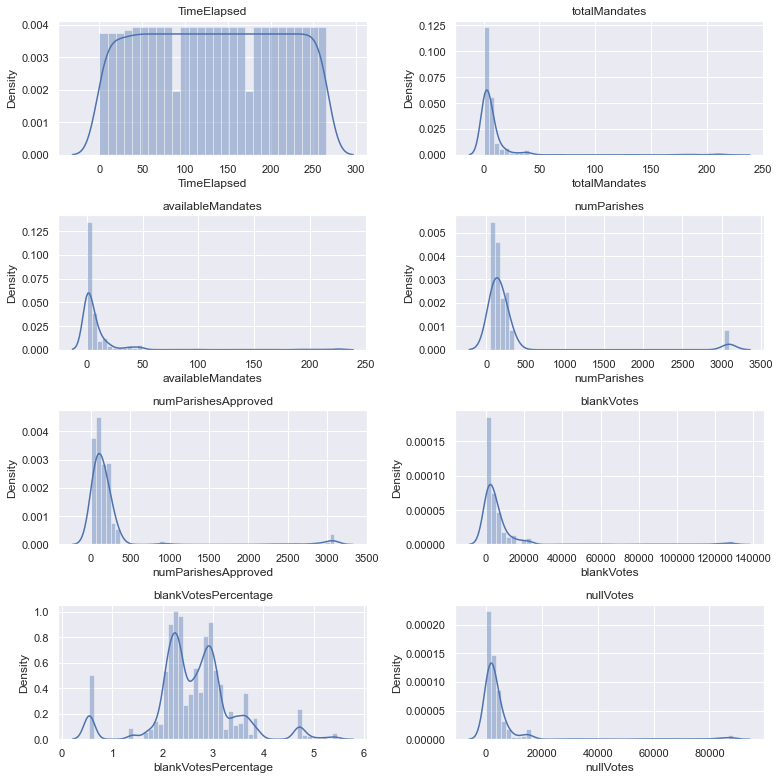

In [95]:
for i,col in enumerate(numeric[0:8]):
    plt.subplot(4,2 ,i+1)
    sb.distplot(ds[col])
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(11, 11)
    plt.tight_layout()
plt.show()

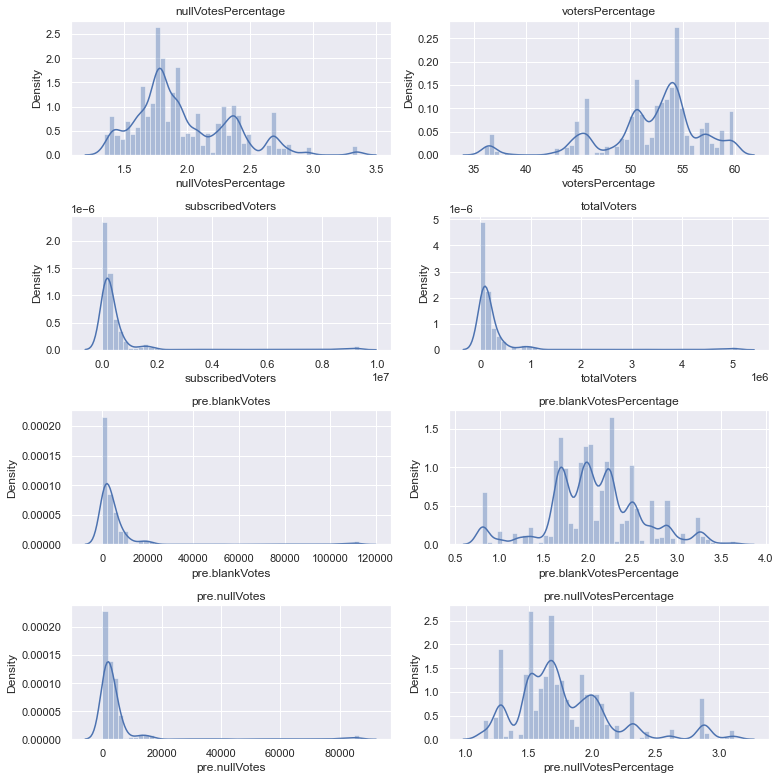

In [96]:
for i,col in enumerate(numeric[8:16]):
    plt.subplot(4,2 ,i+1)
    sb.distplot(ds[col])
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(11, 11)
    plt.tight_layout()
plt.show()

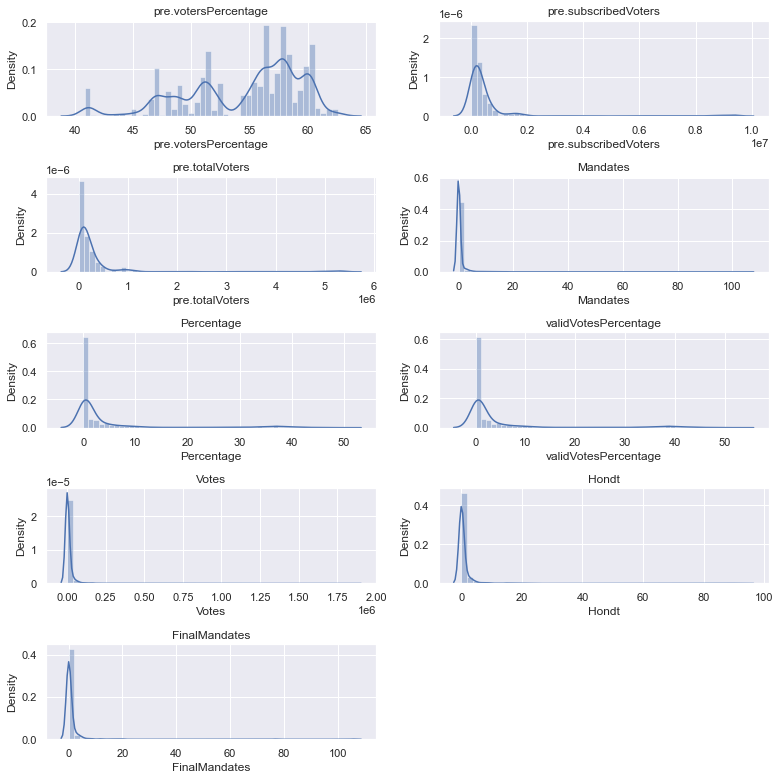

In [97]:
for i,col in enumerate(numeric[16:]):
    plt.subplot(5,2 ,i+1)
    sb.distplot(ds[col])
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(11, 11)
    plt.tight_layout()
plt.show()

From above distributions, we see most columns are right skewed. 

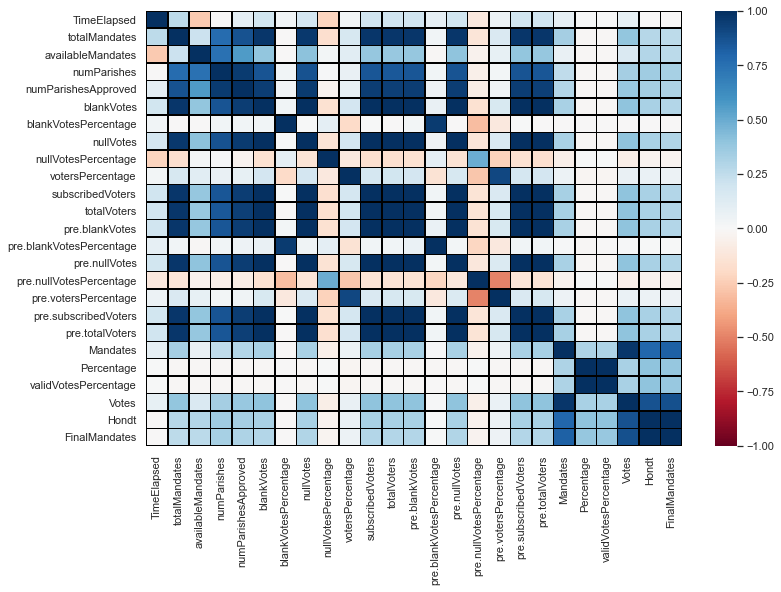

In [98]:
plt.figure(figsize = (12,8))
sb.heatmap(ds[numeric].corr(), cmap = 'RdBu', vmin = -1, vmax = 1,
                           center = 0, linewidth = 0.5, linecolor = 'black')
plt.show()

From above heatmaps, we see high multicollinearity within features. Also, we see that the target variable (Final Mandates), is much dependent on Hondt (Number of MP's according to the distribution of votes now) rather then Votes (Percentage of party votes) and current Mandates.

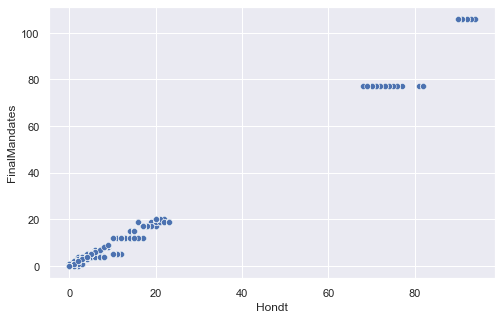

In [99]:
plt.figure(figsize = (8,5))
sb.scatterplot(x = 'Hondt', y = 'FinalMandates', data = ds)
plt.show()

From above plot, initially  FinalMandates shows linear relationship with Hondt, and after certain Hondt values, the values gets discretized.

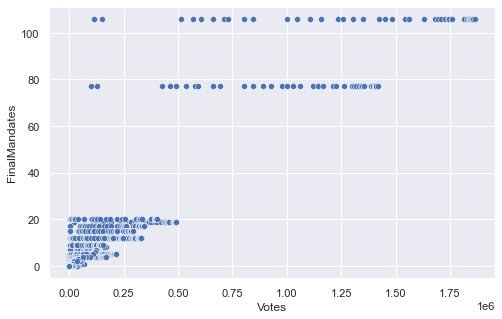

In [100]:
plt.figure(figsize = (8,5))
sb.scatterplot(x = 'Votes', y = 'FinalMandates', data = ds)
plt.show()

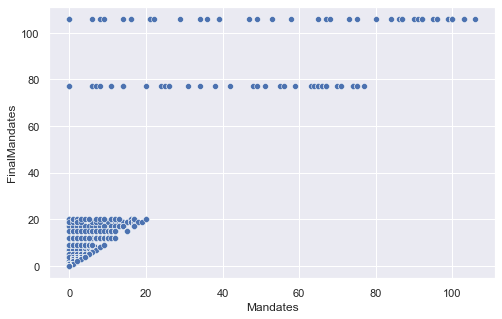

In [101]:
plt.figure(figsize = (8,5))
sb.scatterplot(x = 'Mandates', y = 'FinalMandates', data = ds)
plt.show()

From above plots, Mandates and Votes shows similar trend in determining Final Mandates, in which after certain values, the number of the Final Mandantes jumps to certain values, in other words, it shows discrete values.

In [102]:
# finding total FinalMandates for respective parties
party_wise_mandates = ds.groupby('Party')['FinalMandates'].agg(['sum']).sort_values('sum', ascending = False)

In [103]:
party_wise_mandates

,sum
Party,
PS,11427
PPD/PSD,8302
B.E.,2052
PCP-PEV,1296
CDS-PP,540
PAN,432
CH,108
IL,108
L,108


In [104]:
# grouping parties after 'PAN' as 'Other parties'
party_wise_mandates = party_wise_mandates.reindex(index = ['PS','PPD/PSD','B.E.','PCP-PEV','CDS-PP','PAN','Other parties'],
                           fill_value = int(party_wise_mandates.loc['CH':].sum()))

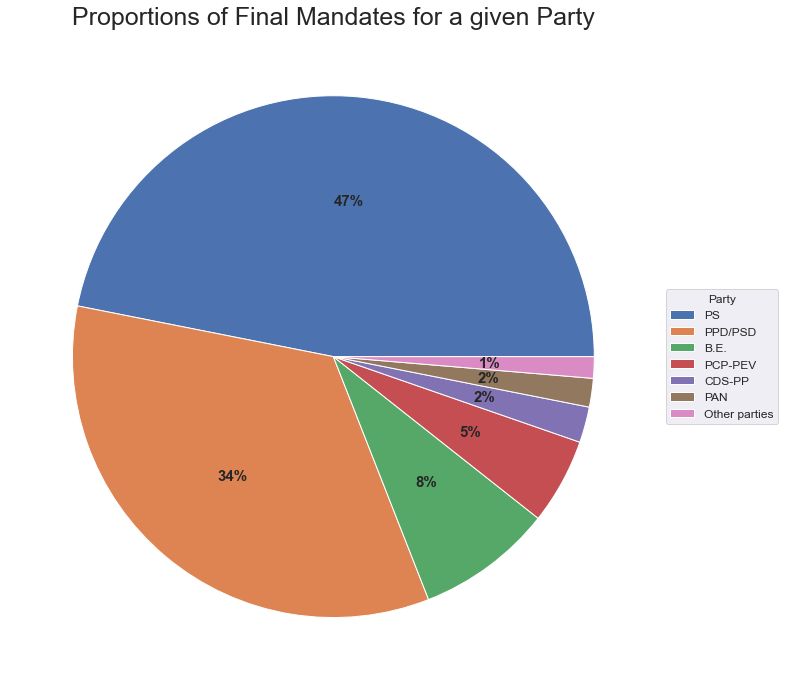

In [105]:

plt.figure(figsize = (22,12))
wedges, texts, autotexts = plt.pie(party_wise_mandates.iloc[:,0], radius = 1,
       autopct ='%0.00f%%', textprops={'fontsize': 50})
plt.legend(wedges,party_wise_mandates.index,
          title="Party",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop = {'size':12}, fontsize = 20)
plt.setp(autotexts, size = 15, weight="bold")
plt.title('Proportions of Final Mandates for a given Party', fontsize = 25 )
plt.show()

From above plot, we see that majority of Final Mandates were selected from the PS and PDD/PSD.

In [106]:
# finding total votes for a given party
party_wise_votes = ds.groupby('Party')['Votes'].agg(['sum']).sort_values('sum', ascending = False)

In [107]:
party_wise_votes

,sum
Party,
PS,132365510
PPD/PSD,103212955
B.E.,33526986
PCP-PEV,21873464
CDS-PP,15564810
PAN,10903515
CH,4499005
IL,3925509
L,3427336


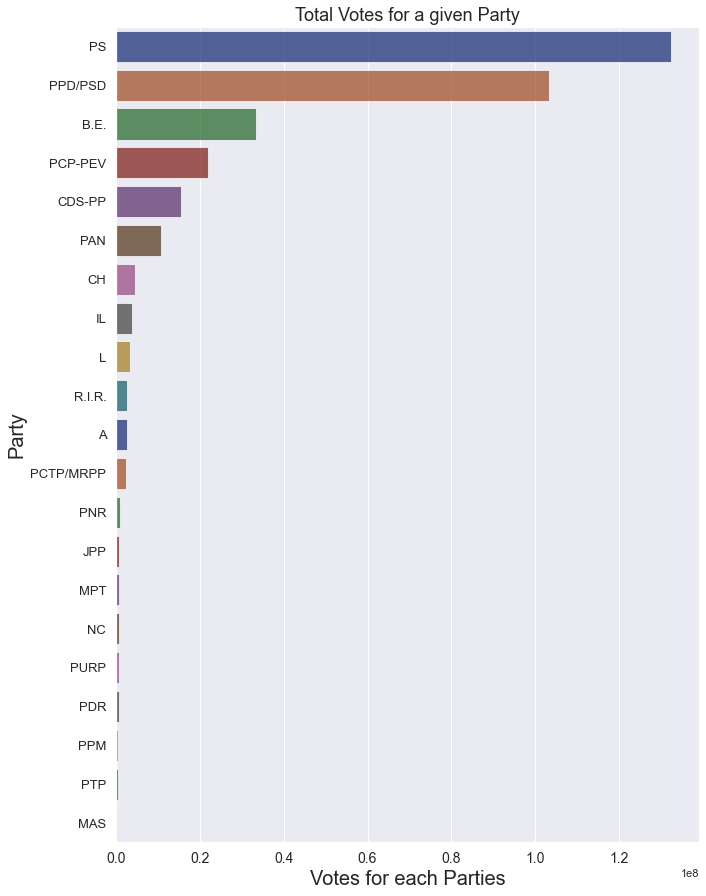

In [108]:
plt.figure(figsize = (23,15))


df = party_wise_votes.reset_index()[['Party','sum']]

plt.subplot(1,2,1)
sb.barplot(x = 'sum' , y = 'Party' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 13)
plt.ylabel('Party', fontsize =  20)
plt.xlabel('Votes for each Parties' , fontsize = 20)
plt.title('Total Votes for a given Party', fontsize = 18 )
plt.show()

In [109]:
# grouping parties after 'PAN' as 'Other parties'
party_wise_votes = party_wise_votes.reindex(index = ['PS','PPD/PSD','B.E.','PCP-PEV','CDS-PP','PAN','Other parties'],
                           fill_value = int(party_wise_votes.loc['CH':].sum()))

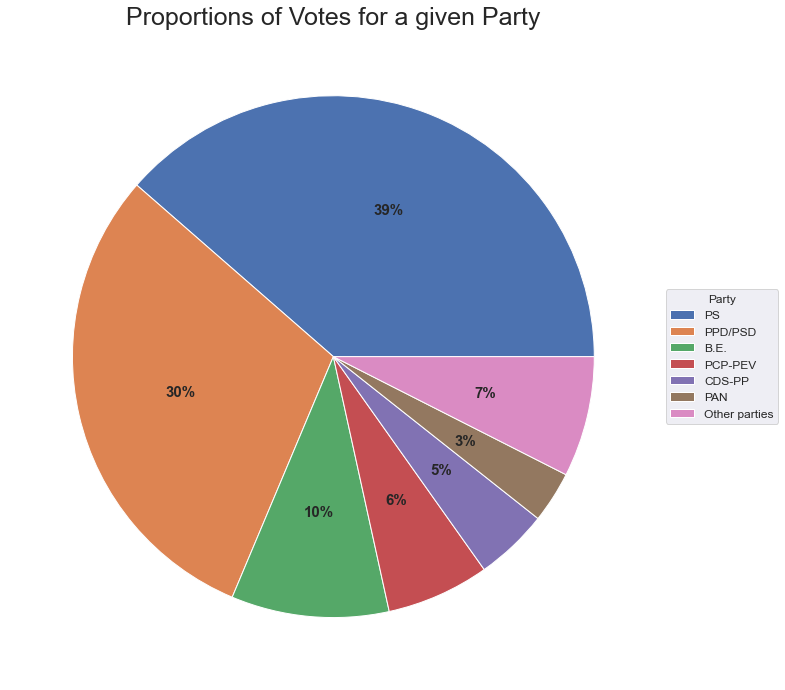

In [110]:

plt.figure(figsize = (22,12))
wedges, texts, autotexts = plt.pie(party_wise_votes.iloc[:,0], radius = 1,
       autopct ='%0.00f%%', textprops={'fontsize': 50})
plt.legend(wedges,party_wise_votes.index,
          title="Party",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop = {'size':12}, fontsize = 20)
plt.setp(autotexts, size = 15, weight="bold")
plt.title('Proportions of Votes for a given Party', fontsize = 25 )
plt.show()

In [111]:
cat

['time', 'territoryName', 'Party', 'date(weekday)']

In [112]:
ds

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,date(weekday)
0,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,PS,0,38.29,40.22,147993,94,106,SUN
1,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,SUN
2,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,B.E.,0,6.81,7.15,26307,16,19,SUN
3,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,SUN
4,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,SUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,NC,0,0.19,0.20,332,0,0,MON
21639,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,PNR,0,0.18,0.19,326,0,0,MON
21640,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,MPT,0,0.14,0.15,256,0,0,MON
21641,265,00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,371931,190712,PTP,0,0.13,0.14,239,0,0,MON


In [113]:
# creating 'territory_party' dataframe containing information about winning party for a particular territory and number of votes.
territory_party = []

for territory in ds['territoryName'].unique():
     
        party =  ds.groupby(['territoryName','Party'])['Votes'].agg(['sum']).sort_values('sum', ascending = False).loc[territory].index[0]
        votes =  float(ds.groupby(['territoryName','Party'])['Votes'].agg(['sum']).sort_values('sum', ascending = False).loc[territory].values[0])
        territory_party .append((territory,party,votes))

territory_party = pd.DataFrame(territory_party, columns = ['Territory', 'Winning Party', 'Votes'])

In [114]:
float(ds.groupby(['territoryName','Party'])['Votes'].agg(['sum']).sort_values('sum', ascending = False).loc['Beja'].values[0])

1224668.0

In [115]:
territory_party

,Territory,Winning Party,Votes
0,Território Nacional,PS,66412641.0
1,Aveiro,PS,4246871.0
2,Beja,PS,1224668.0
3,Braga,PS,7000922.0
4,Bragança,PPD/PSD,1124670.0
5,Castelo Branco,PS,1746800.0
6,Coimbra,PS,3170198.0
7,Évora,PS,1198802.0
8,Faro,PS,2581050.0
9,Guarda,PS,1332926.0


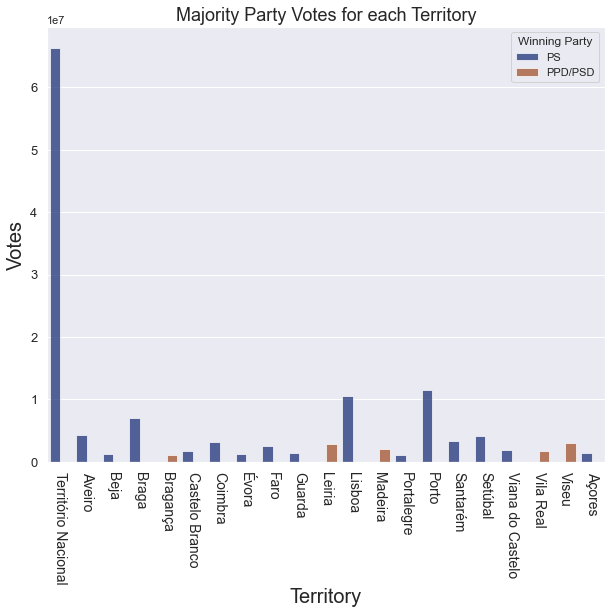

In [116]:
plt.figure(figsize = (10,8
                     ))
sb.barplot(x = 'Territory' , y = 'Votes' ,data = territory_party, hue = 'Winning Party'
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14, rotation = -90)
plt.yticks(fontsize = 13)
plt.ylabel('Votes', fontsize =  20)
plt.xlabel('Territory' , fontsize = 20)
plt.title('Majority Party Votes for each Territory', fontsize = 18 )
plt.show()

From above graph, we see that on Territorio Nacional, PS party won  by significantly large margin.
Also, PS party has won in majority across different territories. 

In [117]:
# day wise total FinalMandates
day_wise_mandates = ds.groupby('date(weekday)')['FinalMandates'].agg(['sum']).sort_values('sum', ascending = False)

In [118]:
day_wise_mandates

,sum
date(weekday),
SUN,20757
MON,3616


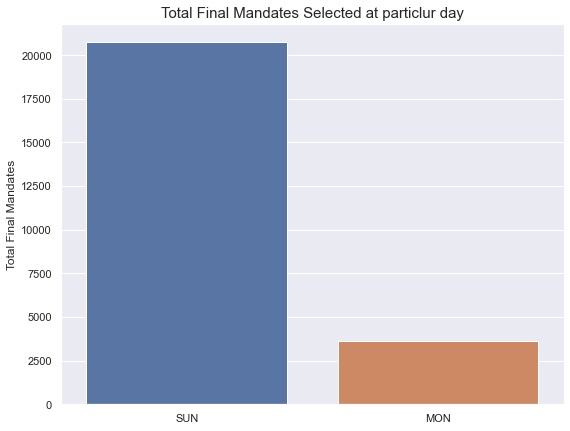

In [119]:
plt.figure(figsize = (9,7))
sb.barplot(x = day_wise_mandates.index, y = 'sum', data = day_wise_mandates)
plt.xlabel('')
plt.ylabel('Total Final Mandates')
plt.title('Total Final Mandates Selected at particlur day', fontsize = 15)
plt.show()

From above graph, we see that majority of mandates where selected on Sundays.

In [120]:
# Splitting data into train-test set.
x_train, x_test, y_train, y_test = train_test_split(ds.drop(['FinalMandates'], 1), 
                                                    ds.FinalMandates,
                                                test_size = 0.30, random_state = 42) 

In [121]:
# target encoding features that are in target_encoding_list using tuned smoothing value.
for col in cat:
    
        encoder =  ce.TargetEncoder(cols = col)
        x_train[col] = encoder.fit_transform(x_train[col], y_train)
        x_test[col] = encoder.transform(x_test[col])

In [122]:
k = KFold(n_splits = 10)

### Base Model Evaluation

model: RandomForestRegressor()
CV score:0.9999137442622527
score_std: 6.793182644730412e-05
----------
model: LinearRegression(normalize=True)
CV score:0.9918642805286375
score_std: 0.002383119875751333
----------
model: SVR()
CV score:0.22660481019638584
score_std: 0.04723702220172622
----------
model: AdaBoostRegressor()
CV score:0.9961159590236492
score_std: 0.0016396275034190892
----------
model: GradientBoostingRegressor()
CV score:0.9994564163408736
score_std: 0.0001647977289653689
----------
model: KNeighborsRegressor()
CV score:0.9384200251063014
score_std: 0.03442300351704195
----------
model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators

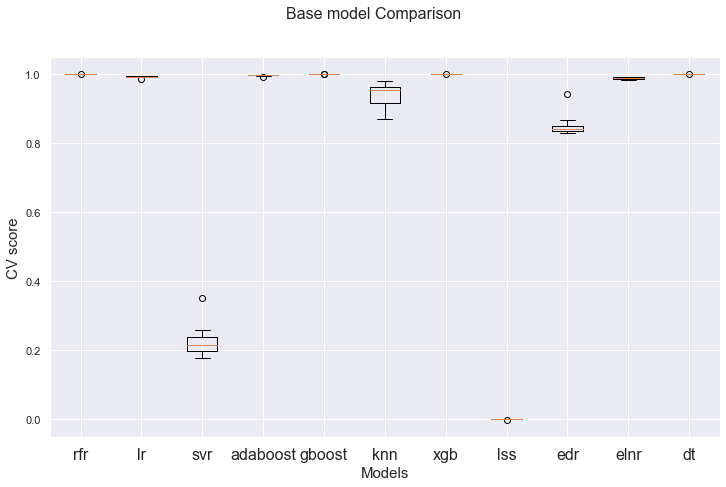

In [123]:
# inilializing different models
rfr = RandomForestRegressor()
svr = SVR()
lr = LinearRegression(normalize = True)
adaboost =  AdaBoostRegressor()
gboost = GradientBoostingRegressor()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor()
lss = Lasso(normalize = True)
rdr = Ridge(normalize = True)
elnr = ElasticNet()
dt = DecisionTreeRegressor()

models = [rfr, lr, svr, adaboost, gboost, knn, xgb, lss, rdr, elnr, dt]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfr', 'lr','svr', 'adaboost', 'gboost', 'knn', 'xgb','lss','edr','elnr','dt'],
                  fontsize = 16)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('CV score', fontsize = 15)
fig.set_size_inches(12,7)
plt.show() 

From above cross-val-scores, we see most of the models performed well and particularly lr and dt almost performed on par with complex models like- xgb, rfr, gboost, etc. Therefore, we shall select only simple models like lr and dt as these are simpler to deploy.

### Testing

In [124]:
# testing for train data

print('*******TRAIN RESULTS*******')
print('\n')

for model in [LinearRegression(normalize = True), DecisionTreeRegressor()]:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_train)
        score = r2_score(y_train, y_pred)
        print('model',model)
        print('accuracy (r2_score):',  round(score*100,2),'%')
        print('root_mean_squared_error:',mean_squared_error(y_train, y_pred, squared = False))
        print('-------------------------------------------')

*******TRAIN RESULTS*******


model LinearRegression(normalize=True)
accuracy (r2_score): 99.24 %
root_mean_squared_error: 0.5723404487102882
-------------------------------------------
model DecisionTreeRegressor()
accuracy (r2_score): 100.0 %
root_mean_squared_error: 0.0
-------------------------------------------


In [125]:
# testing for test data

print('*******TEST RESULTS*******')
print('\n')

for model in [LinearRegression(normalize = True), DecisionTreeRegressor()]:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test, y_pred)
        print('model',model)
        print('accuracy (r2_score):',  round(score*100,2),'%')
        print('root_mean_squared_error:',mean_squared_error(y_test, y_pred, squared = False))
        print('-------------------------------------------')

*******TEST RESULTS*******


model LinearRegression(normalize=True)
accuracy (r2_score): 99.46 %
root_mean_squared_error: 0.5502353844456277
-------------------------------------------
model DecisionTreeRegressor()
accuracy (r2_score): 100.0 %
root_mean_squared_error: 0.02774995612041658
-------------------------------------------


Here, we can see that DecisionTreeRegressor performed better on test set on both the metrics, therefore, we shall choose it as our regression model for this project.

In [126]:
# selecting best model as DecisionTreeRegressor.
selected_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=2,
                      min_samples_split=4, random_state=40)
selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

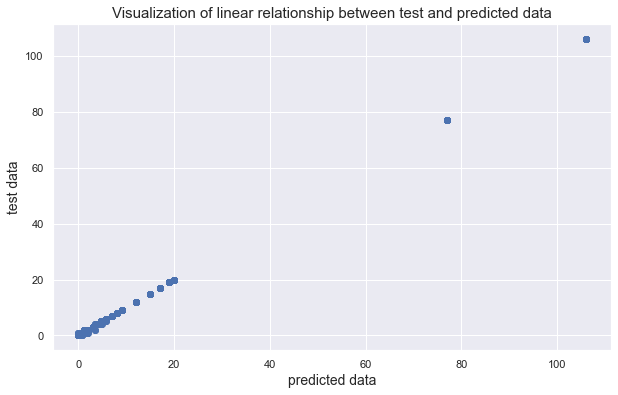

In [127]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred.reshape(-1,1),y_test.values.reshape(-1,1))
plt.xlabel('predicted data', fontsize = 14)
plt.ylabel('test data',  fontsize = 14)
plt.title('Visualization of linear relationship between test and predicted data',fontsize = 15 )
plt.show()

Output from the model follows linearly with the actual/test data, which is standard for a good model.

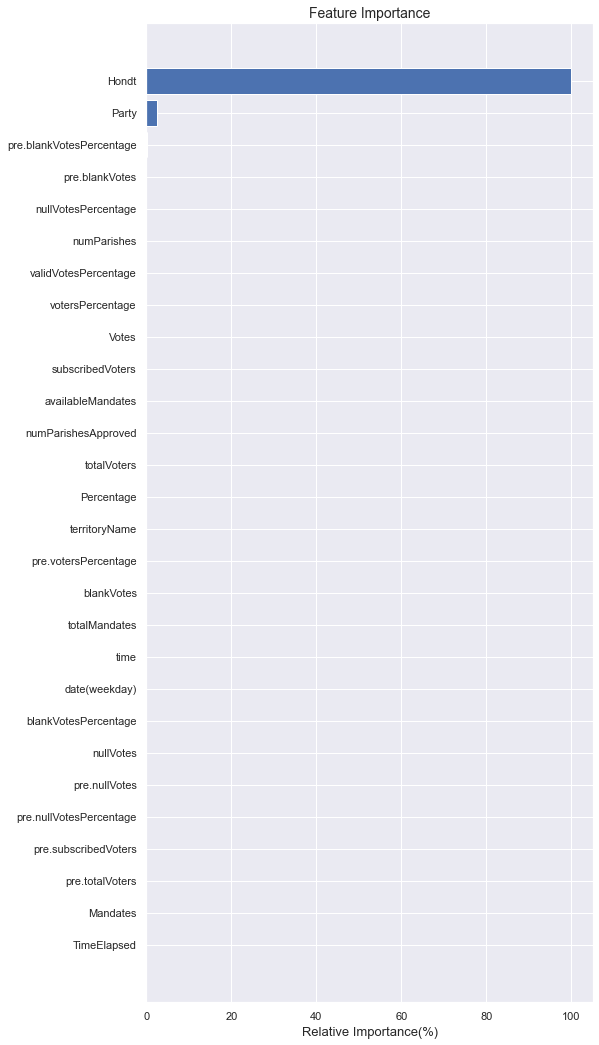

In [128]:
feature_importance = selected_model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
yl = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8, 18))
plt.barh(yl, feature_importance[sorted_idx], align='center')
plt.yticks(yl, x_train.keys()[sorted_idx])
plt.xlabel('Relative Importance(%)',fontsize = 13)
plt.title('Feature Importance',fontsize = 14)
plt.show()

According to feature importance of selected model, we see that, the prediction of number of FinalMandates is highly dependant on Hondt (Number of MP's according to the distribution of votes now), also, we see that the MP belonging to a particular party has relatively less importance in comparision to Hondt.

In [129]:
test_df = pd.DataFrame({'Actual FinalMandates':y_test.values,'Predicted FinalMandates':y_pred})

In [130]:
test_df.to_csv('portugal_election_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [131]:
# Saving the final model as DecisionTreeRegressor.
import joblib

joblib.dump(selected_model, 'portugal_election_pred.obj')
print('Model successfully saved.')

Model successfully saved.
